3 veri seti ile beraber sınıflandırmaları karşılaştıracağız

In [31]:
from sklearn.datasets import make_classification,make_moons, make_circles#veri setleri sırasıyla
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier;
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np


Birinci veri seti

In [32]:
X, y = make_classification(n_features=2, n_redundant=0,n_informative=2,n_clusters_per_class=1,random_state=42)
X+=1.2 *np.random.uniform(size = X.shape)#gürültü ekliyoruz
Xy = (X, y)
#plt.scatter(X[:,0],X[:,1],c = y)

İkinci veri seti

In [33]:
X,y = make_moons(noise = 0.2,random_state=42)
#plt.scatter(X[:,0],X[:,1],c = y)

Üçüncü veri seti

In [34]:
X, y = make_circles(noise = 0.1,factor = 0.3,random_state=42)
#plt.scatter(X[:,0],X[:,1],c = y)

Yukarıdakileri bir dataset içerisinde topluyoruz

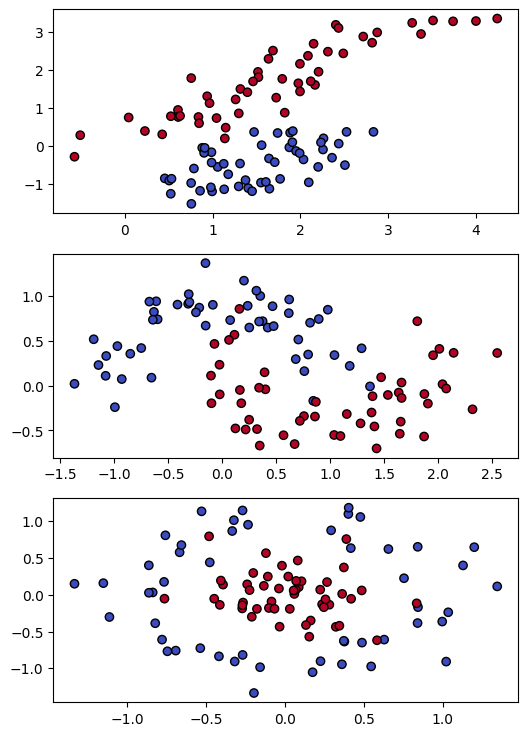

In [35]:
datasets = [
    Xy,
    make_moons(noise = 0.2, random_state=42),
    make_circles(noise = 0.2, random_state=42,factor=0.3)
]
fig = plt.figure(figsize=(6,9))
i=1
for ds_cnt, ds in enumerate(datasets):
    X, y = ds

    ax = plt.subplot(len(datasets),1,i)
    ax.scatter(X[:,0],X[:,1],c = y, cmap = plt.cm.coolwarm,edgecolors= "black")
    i += 1
plt.show()

In [36]:
names = ["Nearest Neighbors","Linear SVM","Decision Tree","Random Forest","Naive Bayes"]
classifiers =[KNeighborsClassifier(),
              SVC(),
              DecisionTreeClassifier(),
              RandomForestClassifier(),
              GaussianNB()]

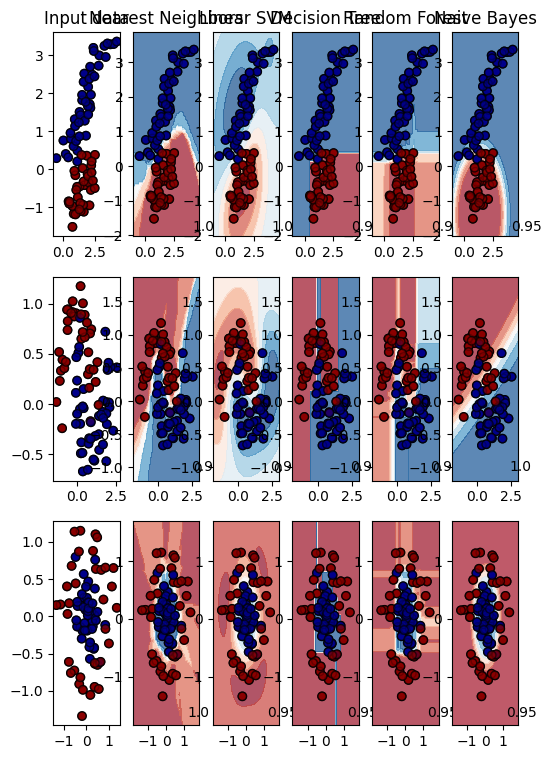

In [37]:
fig = plt.figure(figsize=(6,9))
i=1
for ds_cnt,ds in enumerate(datasets):
    X,y = ds
    X_train,X_test,y_train,y_test =train_test_split(X,y,test_size= 0.2,random_state=42)

    cm_bright = ListedColormap(["darkred","darkblue"])
    ax = plt.subplot(len(datasets),len(classifiers)+1,i)
    if ds_cnt == 0:
        ax.set_title("Input data")

    #plot trainig data
    ax.scatter(X_train[:,0],X_train[:,1],c = y_train, cmap = cm_bright,edgecolors="black")

    #plot test data
    ax.scatter(X_train[:,0],X_train[:,1],c = y_train, cmap = cm_bright,edgecolors="black",alpha =0.6)
    i+=1

    for name,clf in zip(names,classifiers):

        ax = plt.subplot(len(datasets),len(classifiers)+1,i)

        clf = make_pipeline(StandardScaler(),clf)
        clf.fit(X_train,y_train)
        score = clf.score(X_test,y_test)#accuarcy
        DecisionBoundaryDisplay.from_estimator(clf,X,cmap = plt.cm.RdBu,alpha = 0.7,ax = ax,eps = 0.5)
        #plot trainig data
        ax.scatter(X_train[:,0],X_train[:,1],c = y_train, cmap = cm_bright,edgecolors="black")

        #plot test data
        ax.scatter(X_train[:,0],X_train[:,1],c = y_train, cmap = cm_bright,edgecolors="black",alpha =0.6)
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            X[:,0].max()-0.15,
            X[:,1].min()-0.35,
            str(score))
        i+=1
